# **Market Segmentation**
---

Market segmentation is a marketing strategy in which select groups of consumers are identified so that certain products or product lines can be presented to them in a way that appeals to their interests.

Need is to segment the customers which are more likely to each other. Dataset contains some of the charcteristics of the customer and the food ordered by them.

##**Problem**

*  Customer belongs to which group of customers
*  Which variables are the most significant

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Getting the Data

In [60]:
df = pd.read_csv('/content/drive/MyDrive/data/Uber_segmentation/archive/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
# checking for missing values
df.isna().sum()/len(df)

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          0.079494
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


Observations
* There are not much missing values
* 7 percent of the price values are missing

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.00000,1544045709.75510,689192.49259,1543203646.00000,1543443968.00000,1543737478.00000,1544827509.00000,1545160511.00000
hour,693071.00000,11.61914,6.94811,0.00000,6.00000,12.00000,18.00000,23.00000
day,693071.00000,17.79436,9.98229,1.00000,13.00000,17.00000,28.00000,30.00000
month,693071.00000,11.58668,0.49243,11.00000,11.00000,12.00000,12.00000,12.00000
price,637976.00000,16.54513,9.32436,2.50000,9.00000,13.50000,22.50000,97.50000
distance,693071.00000,2.18943,1.13894,0.02000,1.28000,2.16000,2.92000,7.86000
surge_multiplier,693071.00000,1.01387,0.09164,1.00000,1.00000,1.00000,1.00000,3.00000
latitude,693071.00000,42.33817,0.04784,42.21480,42.35030,42.35190,42.36470,42.36610
longitude,693071.00000,-71.06615,0.02030,-71.10540,-71.08100,-71.06310,-71.05420,-71.03300
temperature,693071.00000,39.58439,6.72608,18.91000,36.45000,40.49000,43.58000,57.22000


In [ ]:
df.describe(include=['O']).T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


In [ ]:
l = ['id','timestamp','datetime','cab_type','product_id','timezone','cab_type','product_id','name','windGustTime','short_summary',
     'long_summary','temperatureHighTime','temperatureLowTime','apparentTemperatureHigh','apparentTemperatureHighTime',
     'apparentTemperatureLow','apparentTemperatureLowTime','windBearing','cloudCover','visibility.1','sunriseTime','sunsetTime','moonPhase',
     'precipIntensityMax','uvIndexTime','temperatureMin','temperatureMinTime','temperatureMax','temperatureMaxTime','precipProbability',
     'windGust','uvIndex','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax','apparentTemperatureMaxTime']

In [ ]:
df_1 = df.drop(l,axis=1)
df_1.head().T

,0,1,2,3,4
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
price,5.0,11.0,7.0,26.0,9.0
distance,0.44,0.44,0.44,0.44,0.44
surge_multiplier,1.0,1.0,1.0,1.0,1.0
latitude,42.2148,42.2148,42.2148,42.2148,42.2148
longitude,-71.033,-71.033,-71.033,-71.033,-71.033


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hour                 693071 non-null  int64  
 1   day                  693071 non-null  int64  
 2   month                693071 non-null  int64  
 3   source               693071 non-null  object 
 4   destination          693071 non-null  object 
 5   price                637976 non-null  float64
 6   distance             693071 non-null  float64
 7   surge_multiplier     693071 non-null  float64
 8   latitude             693071 non-null  float64
 9   longitude            693071 non-null  float64
 10  temperature          693071 non-null  float64
 11  apparentTemperature  693071 non-null  float64
 12  precipIntensity      693071 non-null  float64
 13  humidity             693071 non-null  float64
 14  windSpeed            693071 non-null  float64
 15  visibility       

In [ ]:
df_1.describe().apply(lambda s: s.apply('{0:.5f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
hour,693071.00000,11.61914,6.94811,0.00000,6.00000,12.00000,18.00000,23.00000
day,693071.00000,17.79436,9.98229,1.00000,13.00000,17.00000,28.00000,30.00000
month,693071.00000,11.58668,0.49243,11.00000,11.00000,12.00000,12.00000,12.00000
price,637976.00000,16.54513,9.32436,2.50000,9.00000,13.50000,22.50000,97.50000
distance,693071.00000,2.18943,1.13894,0.02000,1.28000,2.16000,2.92000,7.86000
surge_multiplier,693071.00000,1.01387,0.09164,1.00000,1.00000,1.00000,1.00000,3.00000
latitude,693071.00000,42.33817,0.04784,42.21480,42.35030,42.35190,42.36470,42.36610
longitude,693071.00000,-71.06615,0.02030,-71.10540,-71.08100,-71.06310,-71.05420,-71.03300
temperature,693071.00000,39.58439,6.72608,18.91000,36.45000,40.49000,43.58000,57.22000
apparentTemperature,693071.00000,35.88122,7.91871,12.13000,31.91000,35.90000,40.08000,57.22000


In [ ]:
df_1.describe(include=['O']).T

,count,unique,top,freq
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
icon,693071,7,cloudy,218895


In [ ]:
category = []
for i in df_1.columns:
  if df_1[i].dtype=='O':
    category.append(i)


for i in category:
  print('Distribution of',i)
  print(df_1[i].value_counts())
  print('-'*60)

Distribution of source
Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64
------------------------------------------------------------
Distribution of destination
Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64
-------------------------------------

Obsevations
* Data is almost equally distributed for `source` and `destination`
* Weather was cloudy when most of the customers booked cab and least of them booked on foggy day

In [ ]:
for i in df_1.columns:
  if df_1[i].dtype != 'O':
    print('Distribution of',i)
    print(df_1[i].value_counts())
    print('-'*60)

Distribution of hour
0     32413
23    31931
16    30384
17    30384
12    30384
13    30384
18    30384
11    30384
14    30384
10    30384
15    30383
22    29436
9     28971
2     28548
1     28548
4     28330
3     27815
21    27732
19    27555
6     27336
20    26782
5     25008
7     24936
8     24275
Name: hour, dtype: int64
------------------------------------------------------------
Distribution of day
27    76121
28    73691
29    59974
1     45240
30    45084
16    44928
15    44928
14    44928
3     44928
2     44928
17    44928
13    38531
18    36192
26    31587
4     12636
10     2773
9      1674
Name: day, dtype: int64
------------------------------------------------------------
Distribution of month
12    406614
11    286457
Name: month, dtype: int64
------------------------------------------------------------
Distribution of price
7.00     52314
16.50    44351
10.50    40590
13.50    33707
9.00     30884
         ...  
89.50        1
81.50        1
64.50        1
87.0

Observations
* Most of the cabs were booked in the midnight mostly after 10 P.M.
* Month end found to be the most busiest days
* People mostly booking the cabs  which are budget friendly
* In summer People likely to book a cab


## Data Visualization

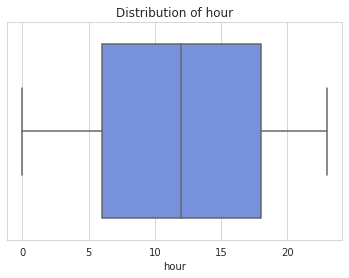

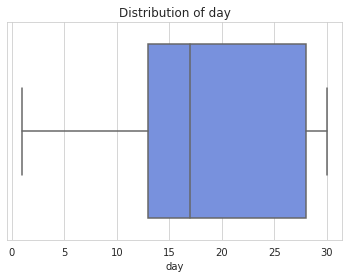

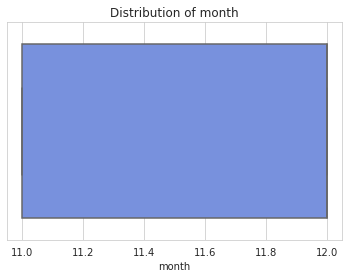

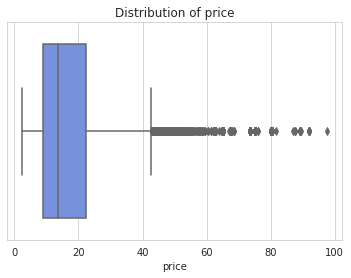

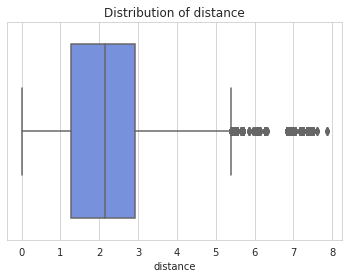

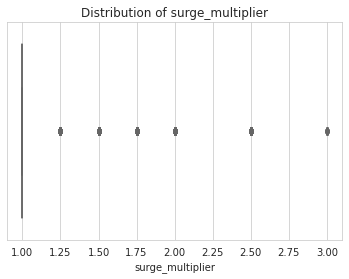

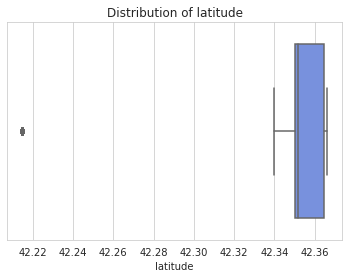

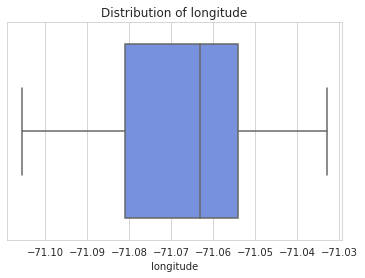

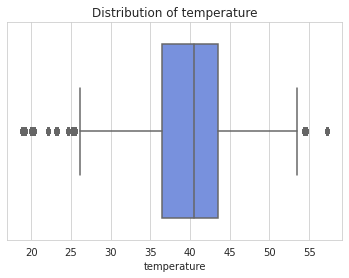

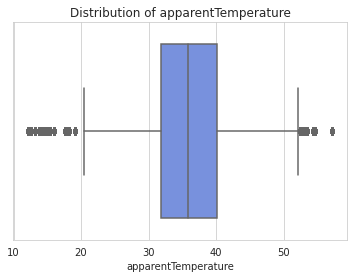

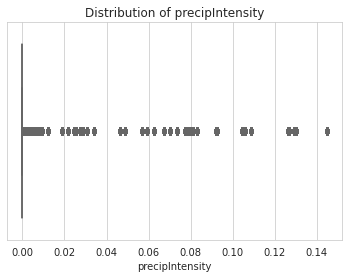

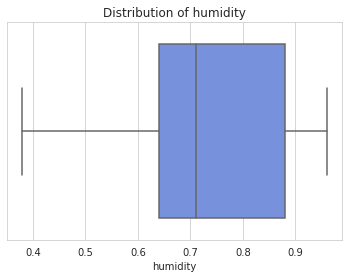

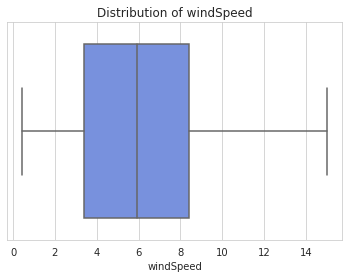

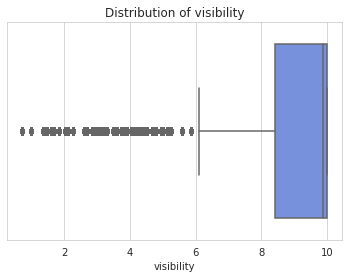

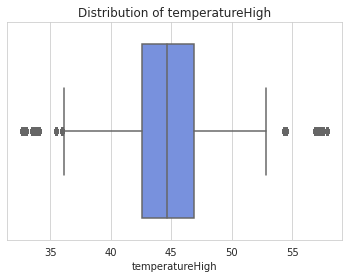

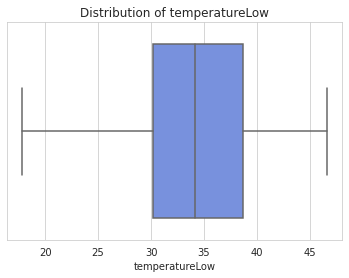

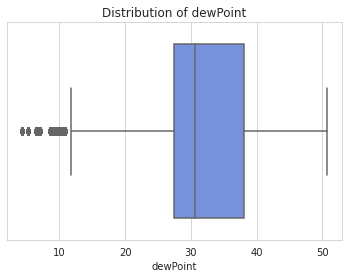

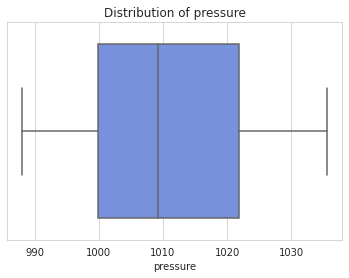

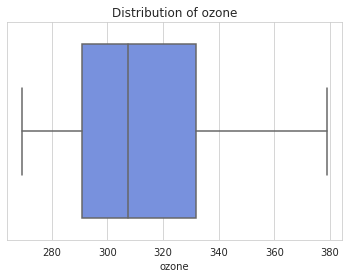

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

for i in df_1.columns:
  if df_1[i].dtype != 'O':
    sns.boxplot(x = df_1[i])
    plt.title('Distribution of '+i)
    plt.show()

Observations
* hour, day, month, latitude, longitude, precipintensity, humidity,  windspeed, temperaturelow, pressure, ozone doesn't have outliers
* Others have outliers needs to check  the data for treatment of the outliers 

### Demographic Analysis

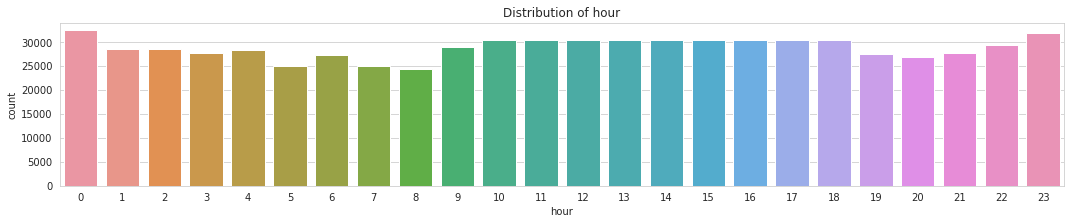

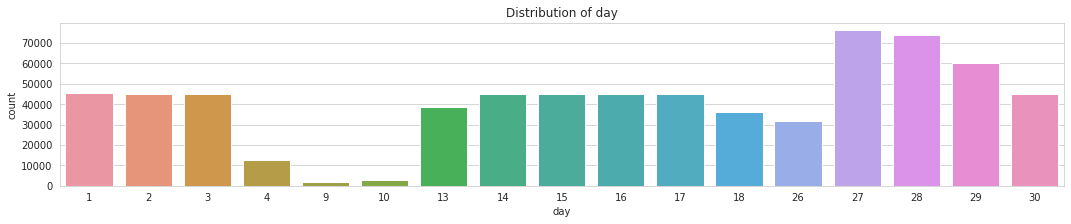

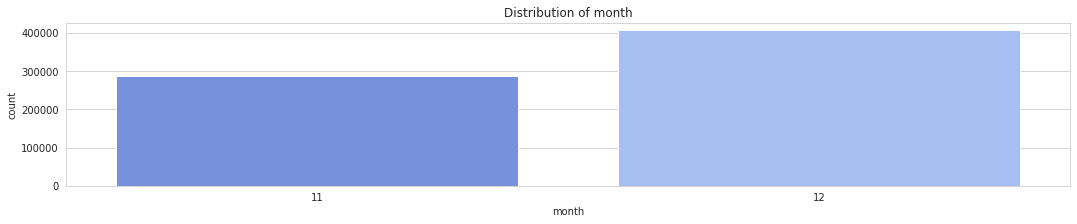

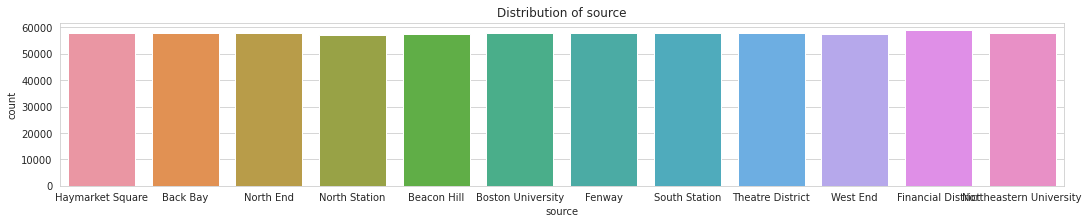

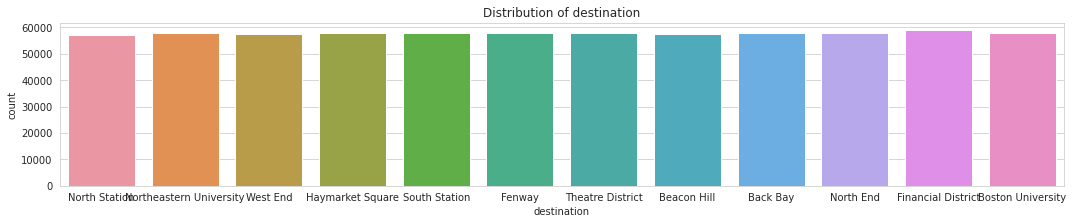

In [ ]:
l = ['hour','day','month','source','destination']

for i in l:
  plt.figure(figsize=(18,3))
  sns.countplot(x=df_1[i])
  plt.title('Distribution of '+i)
  plt.show()

Observations
* 10 A.M. to 6 P.M. and after 10 P.M. are the busiest hour when the customers have booked the cab.
* Month ends seems to be the most  busiest days for the cab drivers where as from 4 to 13 seems cabs are not much used
* Data is of only last 2 months of the year 2018
* Almost equally distributed among all the sources and destinations

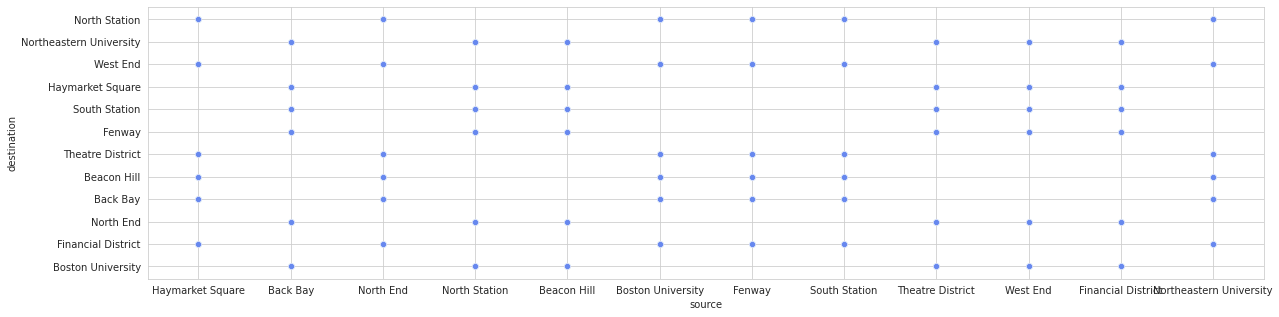

In [ ]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df_1['source'],y = df_1['destination'])

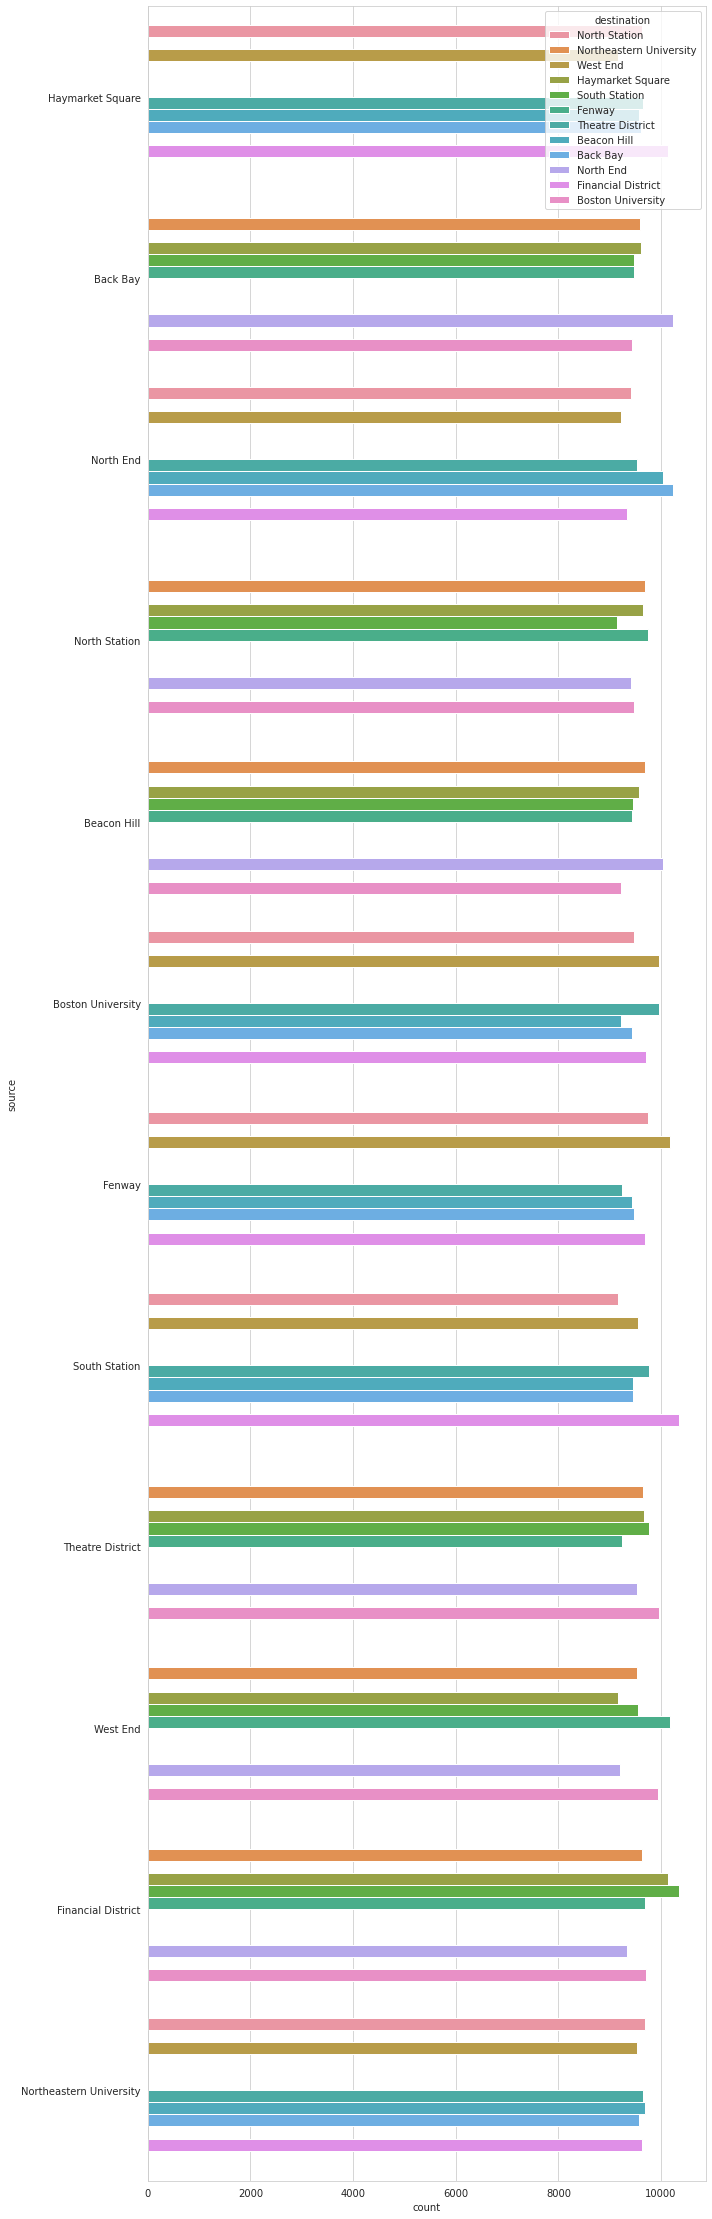

In [ ]:
plt.figure(figsize=(10,40))
sns.countplot(y=df_1['source'],hue=df_1['destination'])

### Geomatric Analysis

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.6 MB/s 
     |████████████████████████████████| 6.3 MB 46.8 MB/s 
     |████████████████████████████████| 16.7 MB 337 kB/s 


In [ ]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
from folium import plugins
from folium.plugins import HeatMap
# extracting longitude and latitude values to separate lists
longs = df_1.longitude.to_list()
lats = df_1.latitude.to_list()
# calculating mean longitude and latitude values
import statistics
meanLong = statistics.mean(longs)
meanLat = statistics.mean(lats)
# create base map object using Map()
mapObj = folium.Map(location=[meanLat, meanLong], tiles="openstreetmap", zoom_start = 10)

In [77]:
# create heatmap layer
df_1.dropna(inplace = True)
heatmap = HeatMap( list(zip(lats, longs, df_1["price"])),
                   min_opacity=0.2,
                   max_val=df_1["price"].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
# add heatmap layer to base map
heatmap.add_to(mapObj)
mapObj

Output hidden; open in https://colab.research.google.com to view.

###Psychographic Analysis

In [74]:
a = 'temperature,apparentTemperature,precipIntensity,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,icon,dewPoint,pressure,ozone'.split(',')


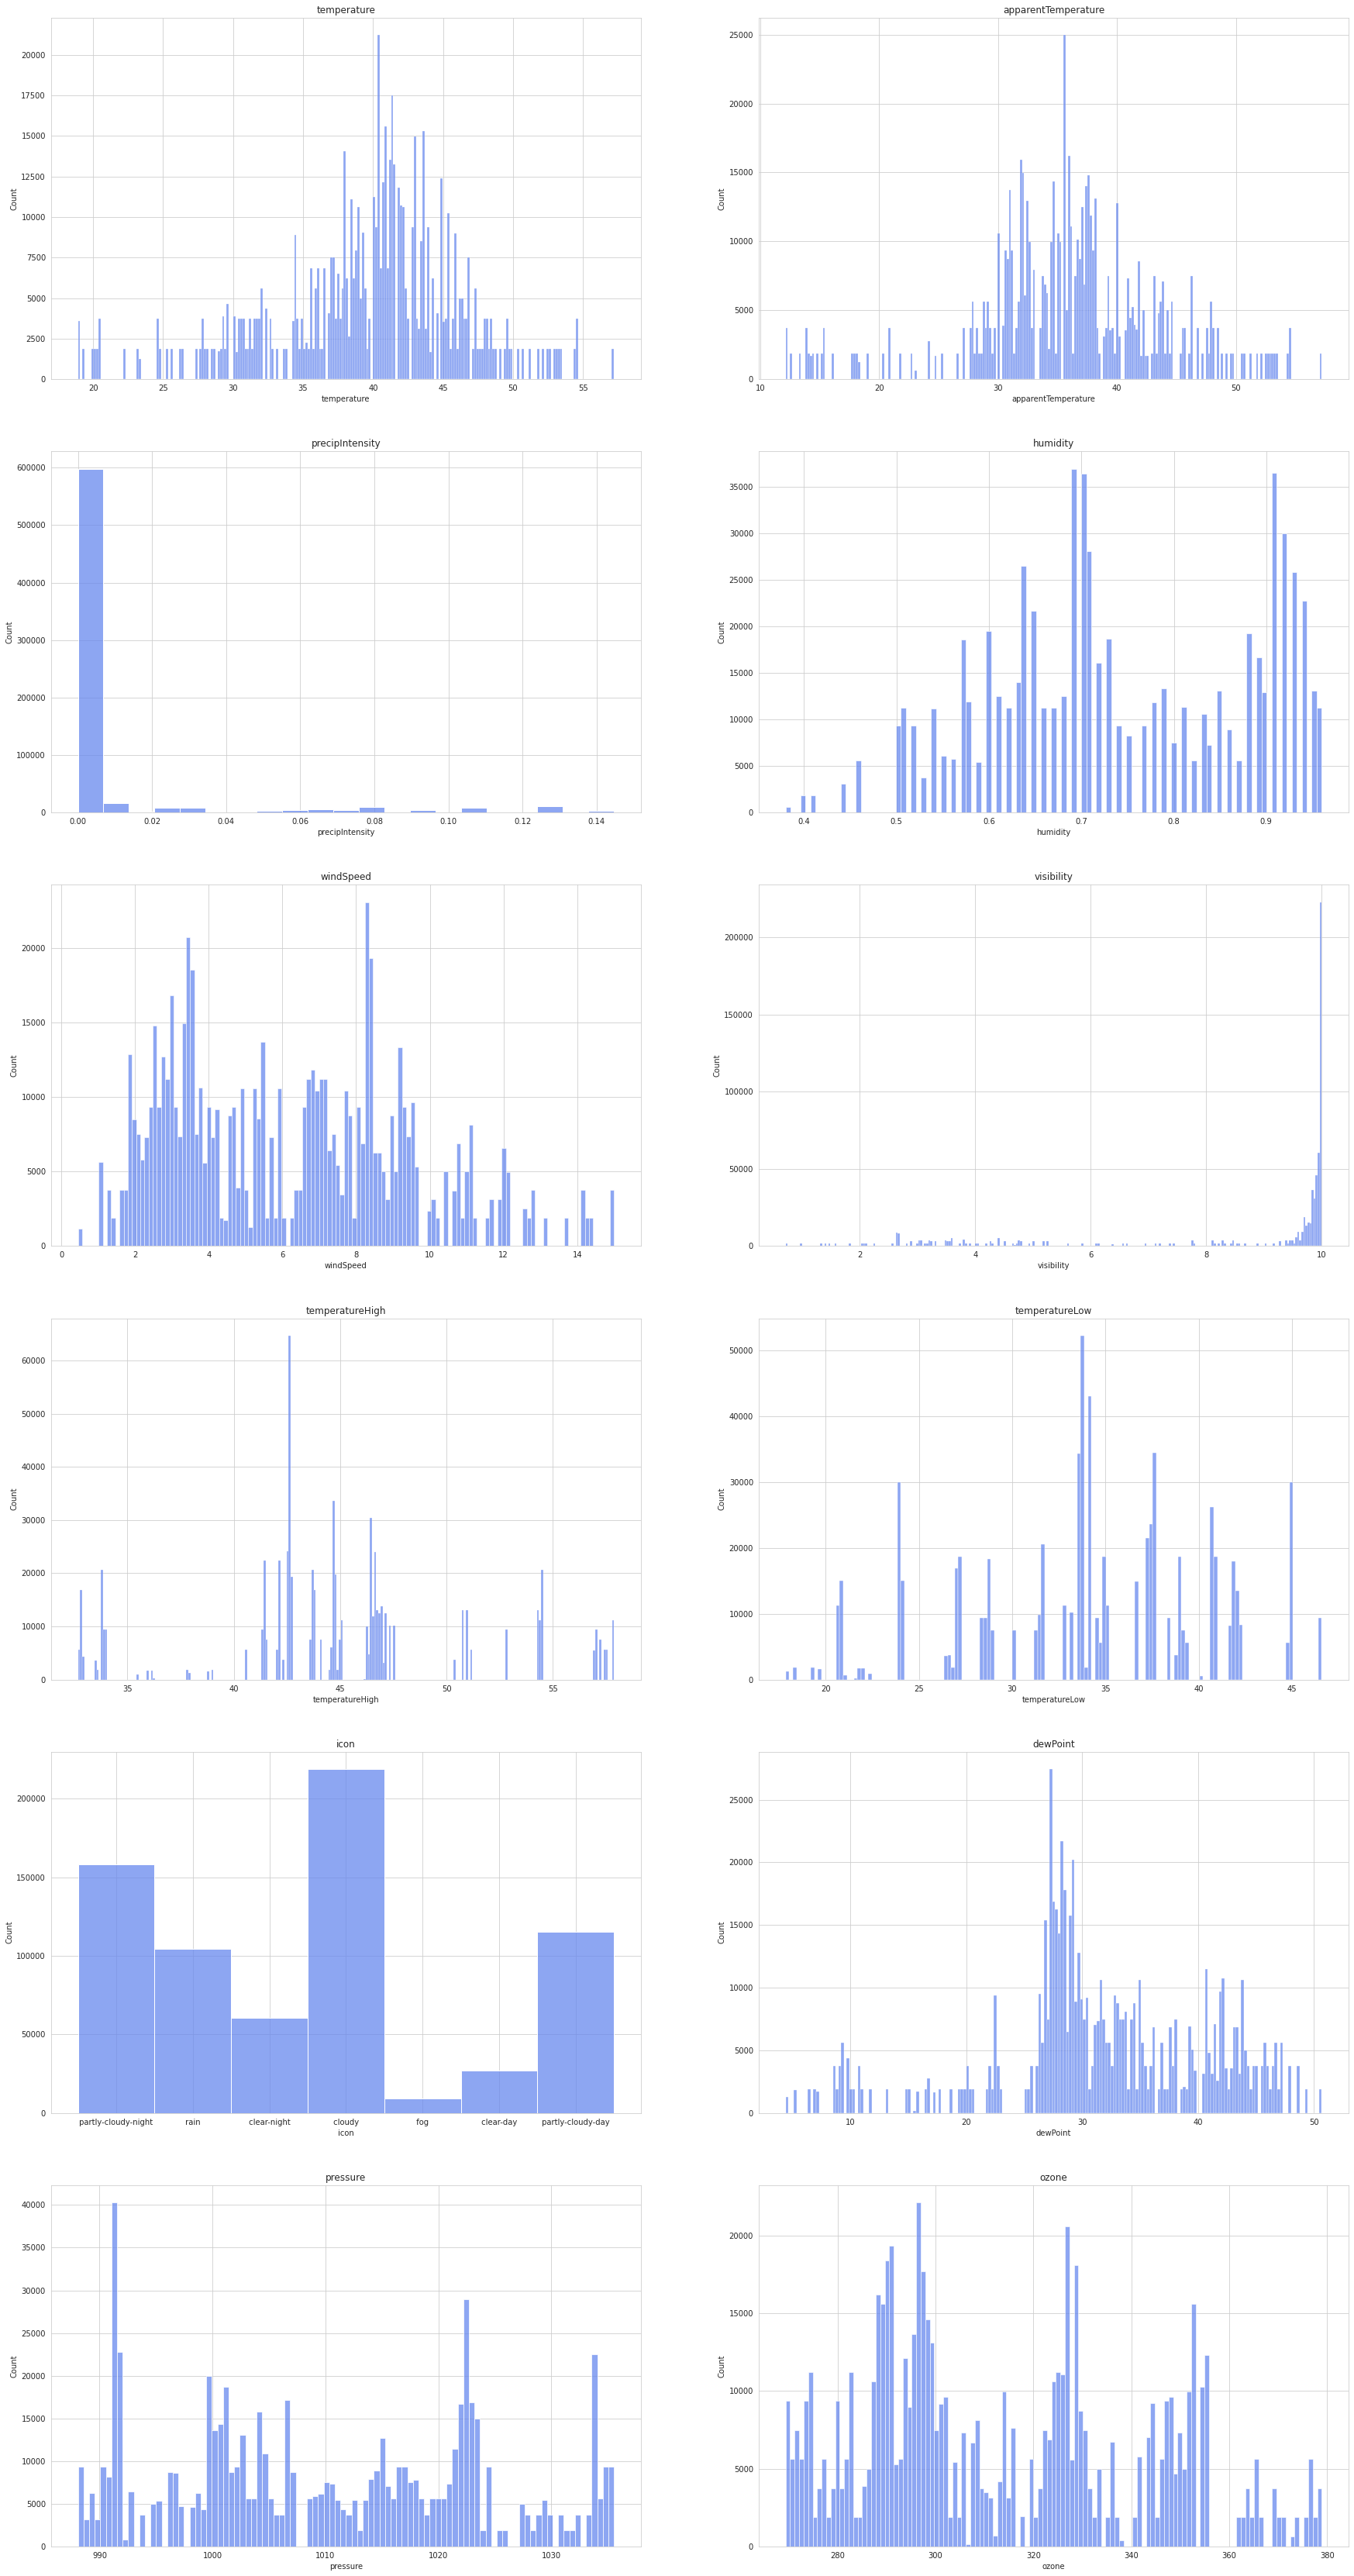

In [ ]:

fig,([ax0,ax1],[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9],[ax10,ax11]) = plt.subplots(ncols=2,nrows=6,figsize=(30,60))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
for i in range(0,12):

  #sns.set(rc={'figure.figsize':(40,20)})
  sns.histplot(data=df_1,x=a[i],ax=ax[i])
  ax[i].set_title(a[i])
  


Observations
* Temperature is kindly normally distributed with most of the values ranging from 35 degrees to 45 degrees
* PrepIntensity is summed around 0.00 and visibilty around 10
* Cloudy day was the most busiest day and surprisely foggy day was the day when least cabs were booked.


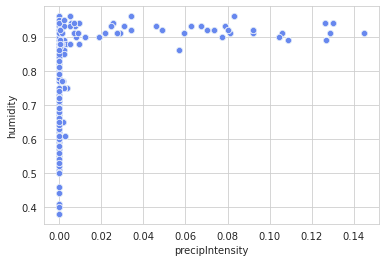

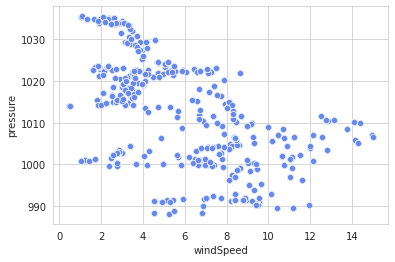

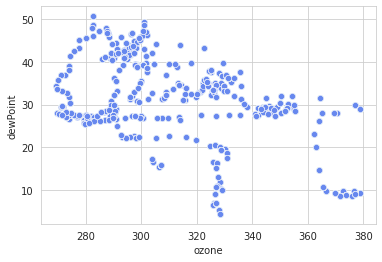

In [63]:
sns.scatterplot(x=df_1['precipIntensity'],y=df_1['humidity'])
plt.show()
sns.scatterplot(x=df_1['windSpeed'],y=df_1['pressure'])
plt.show()
sns.scatterplot(x=df_1['ozone'],y=df_1['dewPoint'])
plt.show()

Observation
* precipintensity greater than 0.01 and humidity greater than 0.8 customer is more likely to ride a cab


###Behaviour Analysis

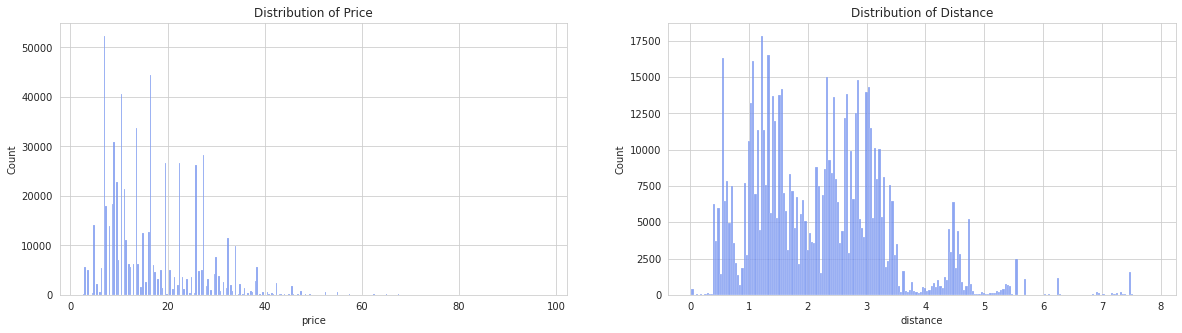

In [68]:
fig,([ax0,ax1]) = plt.subplots(ncols=2,figsize=(20,5))
sns.histplot(x=df_1['price'],ax=ax0)
ax0.set_title('Distribution of Price')
sns.histplot(x=df_1['distance'],ax=ax1)
ax1.set_title('Distribution of Distance')
plt.show()

Observations
* Customers more likely to book a budget friendly cab ranging from 5 to 25
* Most of the customers books cab for shorter distance ranging from 0.5 to 3.5 units

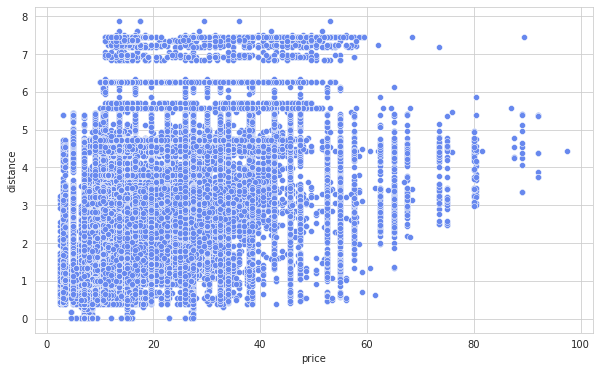

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_1['price'],y = df_1['distance'])
plt.show()

Observation
* As the distance and price of the cab increases the bookins of the customers decreases

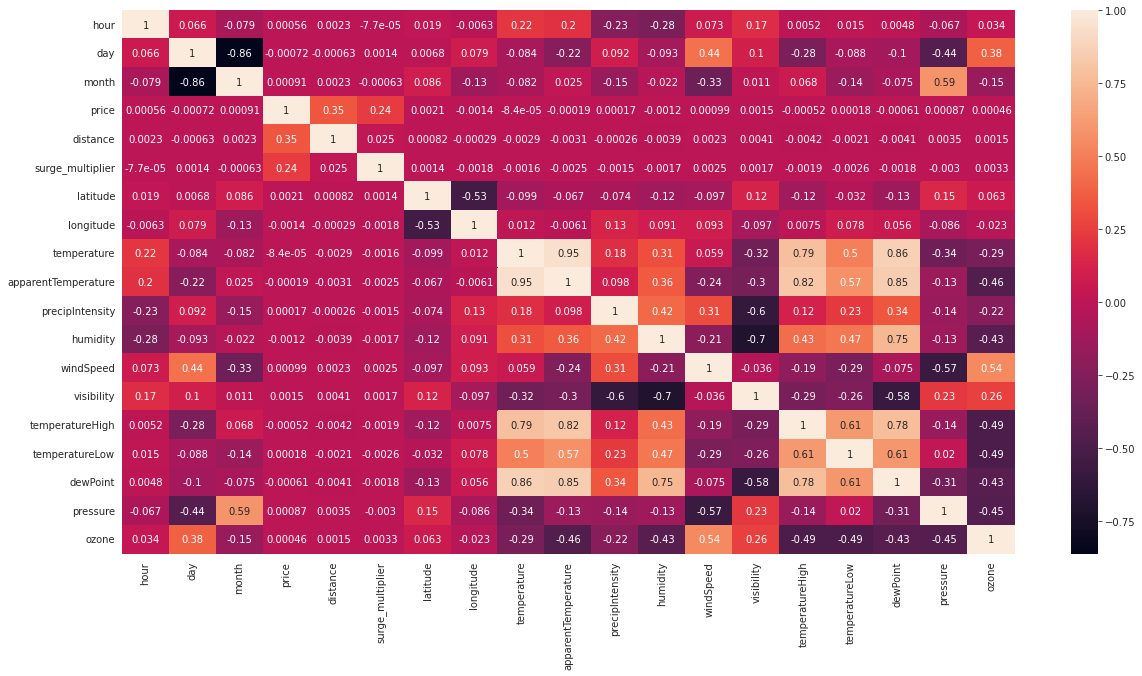

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(df_1.corr(),annot=True)

Observations
* month and day are highly correlated, can remove month columns if needed
*Temperature and apparent temperature are both highly correlated about 95 percent
* Temperature is also corelated with dewpoint and temperaturehigh
* humidity is corelated with dewpoint  and visibility